<a href="https://colab.research.google.com/github/Srishivani/Working_Capital_Optimization/blob/main/Working_Capital_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install statsmodels
!pip install mysql-connector-python
!pip install SQLAlchemy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 48.5 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
pd.options.display.float_format = '{:.2f}'.format
import statsmodels
from statsmodels import api as sm
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

In [ ]:
# Use wget to download the csv file from box in CSV (Direct Link format)
!wget https://tufts.box.com/shared/static/1zr95zt6iahua2ydbs294vxvnwk69j60.xls
!mv 1zr95zt6iahua2ydbs294vxvnwk69j60.xls receivables_data.xls

!wget https://tufts.box.com/shared/static/mnkmanuvlyw5p3gcvxwrvtjy4wx38hcq.xls
!mv mnkmanuvlyw5p3gcvxwrvtjy4wx38hcq.xls payables_data.xls

!wget https://tufts.box.com/shared/static/8mw7ngbzhq8gr6n1tbr5s40m64cflsg2.xls
!mv 8mw7ngbzhq8gr6n1tbr5s40m64cflsg2.xls suppliers_data.xls

!wget https://tufts.box.com/shared/static/5yvhlaptlqdbb7vi5o8dy7bno6so64m4.xls
!mv 5yvhlaptlqdbb7vi5o8dy7bno6so64m4.xls customers_data.xls

--2025-04-05 20:53:55--  https://tufts.box.com/shared/static/1zr95zt6iahua2ydbs294vxvnwk69j60.xls
Resolving tufts.box.com (tufts.box.com)... 74.112.186.157, 2620:117:bff0:12d::
Connecting to tufts.box.com (tufts.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/1zr95zt6iahua2ydbs294vxvnwk69j60.xls [following]
--2025-04-05 20:53:55--  https://tufts.box.com/public/static/1zr95zt6iahua2ydbs294vxvnwk69j60.xls
Reusing existing connection to tufts.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tufts.app.box.com/public/static/1zr95zt6iahua2ydbs294vxvnwk69j60.xls [following]
--2025-04-05 20:53:55--  https://tufts.app.box.com/public/static/1zr95zt6iahua2ydbs294vxvnwk69j60.xls
Resolving tufts.app.box.com (tufts.app.box.com)... 74.112.186.157, 2620:117:bff0:12d::
Connecting to tufts.app.box.com (tufts.app.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiti

   ID  Payterm  Total Open Amount_USD  Credit_limit_x  Payment_Delay  \
0   1       15               54273.30           50000             -1   
1   2       20               79656.60           50000              3   
2   3       15                2253.90          100000            -92   
3   4       15               33133.30          100000              3   
4   5       14               16447.10          100000            -61   

   Credit_limit_y  TA_Early  TA_Late  TA_Ontime  MIDWEST  NORTHEAST  \
0        81421.56     84.43    14.51       1.06    False      False   
1        42777.78     97.71     0.00       2.29     True      False   
2        95569.62     34.33    30.84      34.83    False       True   
3        81421.56     84.43    14.51       1.06    False      False   
4        67800.00      0.16    99.84       0.00    False      False   

   SOUTHEAST  SOUTHWEST   WEST  Diff Posting Baseline  
0      False      False   True                      3  
1      False      False  Fal

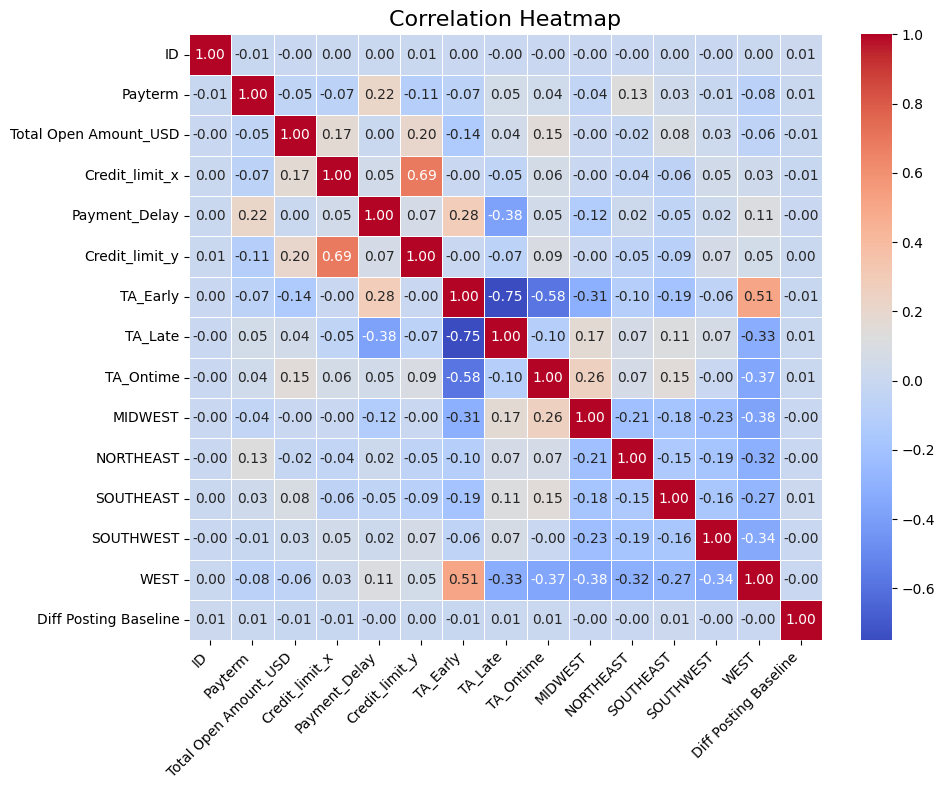

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the receivables data
df = pd.read_excel("receivables_data.xls")

# Ensure a valid copy of the dataframe
df = df.copy()

# Convert date columns to datetime format
date_columns = ['Posting_Date', 'Due_Date', 'Baseline_Date']
df[date_columns] = df[date_columns].apply(pd.to_datetime, format='%m/%d/%Y')

# Convert numeric columns to appropriate types
df['Total Open Amount_USD'] = df['Total Open Amount_USD'].astype(float).round(1)
df['Payterm'] = df['Payterm'].astype(int)
df['DUNNLEVEL'] = df['DUNNLEVEL'].astype(int)
df['Is Open'] = df['Is Open'].astype(int)
df['Credit_limit'] = df['Credit_limit'].astype(int)

# Filter out closed invoices
closed_invoices = df[df['Is Open'] == 0].copy()

# Assign unique IDs
closed_invoices['ID'] = range(1, len(closed_invoices) + 1)

# Convert Payment_Date to datetime format
closed_invoices['Payment_Date'] = pd.to_datetime(closed_invoices['Payment_Date'], format='%m/%d/%Y')

# Calculate payment delay in days
closed_invoices['Payment_Delay'] = (closed_invoices['Due_Date'] - closed_invoices['Payment_Date']).dt.days

# Classify payment behavior
conditions = [
    (closed_invoices['Payment_Delay'] == 0),
    (closed_invoices['Payment_Delay'] < 0),
    (closed_invoices['Payment_Delay'] > 0)
]
choices = ['Ontime', 'Late', 'Early']
closed_invoices['Payment_Flag'] = np.select(conditions, choices, default='NA')

# Aggregating customer-level payment data
customer_payment_summary = closed_invoices.groupby(['Customer Number', 'Payment_Flag'])['Total Open Amount_USD'].sum().reset_index()

# Aggregating other customer-level features
customer_info = closed_invoices.groupby('Customer Number').agg({
    'Invoice ID': 'count',
    'Credit_limit': 'mean',
    'DUNNLEVEL': 'mean'
}).reset_index()

# Pivoting payment summary to get percentages
df_pivot = customer_payment_summary.pivot(index='Customer Number', columns='Payment_Flag', values='Total Open Amount_USD').fillna(0)
df_pivot = df_pivot.rename(columns={'Early': 'TA_Early', 'Late': 'TA_Late', 'Ontime': 'TA_Ontime'})

# Calculate payment percentages
df_pivot_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# Merge aggregated data
customer_data = pd.merge(customer_info, df_pivot_percentage, on='Customer Number', how='left')

# Merge invoice-level data with customer-level data
accounts_receivables = pd.merge(closed_invoices, customer_data, on='Customer Number', how='left')

# Convert Payterm column to integer
accounts_receivables['Payterm'] = accounts_receivables['Payterm'].astype(int)

# One-hot encoding for Region
dummy_region = pd.get_dummies(accounts_receivables['Region'])
accounts_receivables = pd.concat([accounts_receivables, dummy_region], axis=1)

# Calculate the difference between Posting Date and Baseline Date
accounts_receivables['Diff Posting Baseline'] = (accounts_receivables['Posting_Date'] - accounts_receivables['Baseline_Date']).dt.days

# Ensure correct column names for selection
available_columns = accounts_receivables.columns
selected_columns = [col for col in ['ID', 'Invoice ID', 'Payterm', 'Total Open Amount_USD', 'Credit_limit_x', 'Payment_Delay',
    'Credit_limit_y', 'TA_Early', 'TA_Late', 'TA_Ontime', 'MIDWEST', 'NORTHEAST', 'SOUTHEAST',
    'SOUTHWEST', 'WEST', 'Diff Posting Baseline'] if col in available_columns]

# Select relevant columns for modeling
model_columns = accounts_receivables[selected_columns]

# Display the cleaned and structured data
print(model_columns.head())
corr_matrix = model_columns.corr()

# Set up the size of the heatmap for better visualization
plt.figure(figsize=(10, 8))

# Create a correlation plot using seaborn with clearer color map (coolwarm)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and adjust the layout for better aesthetics
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


Distribution of Payment Delays


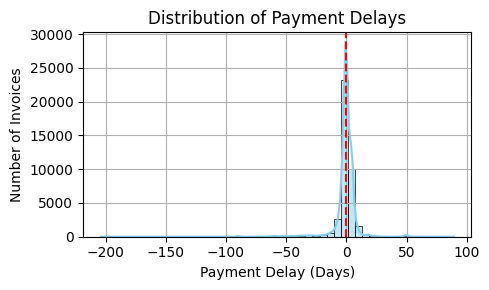

Boxplot of Payment Delay by Region


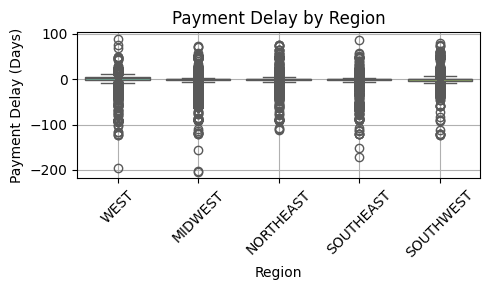

Total Receivables by Region


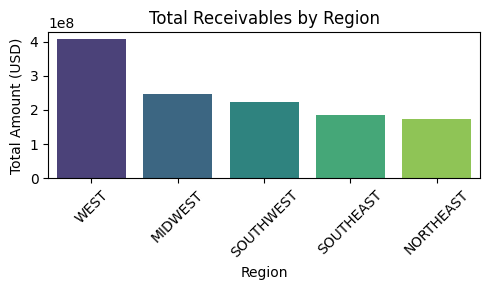

Credit Limit vs Average Payment Delay


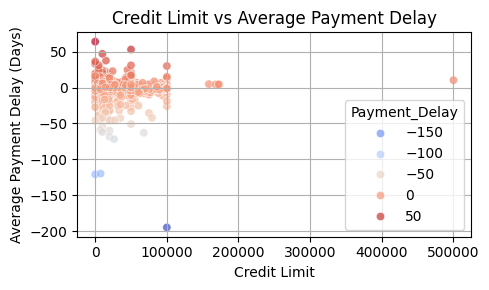

Invoice Volume Over Time


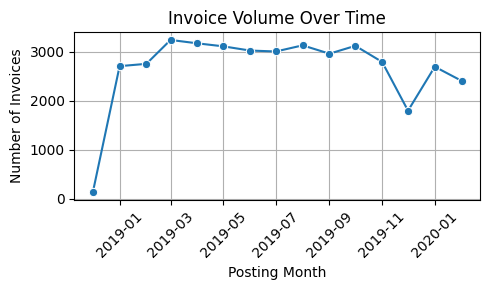

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Payment Delays
print("Distribution of Payment Delays")
plt.figure(figsize=(5, 3))
sns.histplot(closed_invoices['Payment_Delay'], bins=50, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Payment Delays')
plt.xlabel('Payment Delay (Days)')
plt.ylabel('Number of Invoices')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Boxplot of Payment Delay by Region
print("Boxplot of Payment Delay by Region")
plt.figure(figsize=(5, 3))
sns.boxplot(data=accounts_receivables, x='Region', y='Payment_Delay', palette='Set2')
plt.title('Payment Delay by Region')
plt.ylabel('Payment Delay (Days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Total Receivables by Region
print("Total Receivables by Region")
region_receivables = closed_invoices.groupby('Region')['Total Open Amount_USD'].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 3))
sns.barplot(x=region_receivables.index, y=region_receivables.values, palette='viridis')
plt.title('Total Receivables by Region')
plt.ylabel('Total Amount (USD)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Credit Limit vs Average Payment Delay
print("Credit Limit vs Average Payment Delay")
customer_delay = closed_invoices.groupby('Customer Number')['Payment_Delay'].mean().reset_index()
customer_credit = closed_invoices.groupby('Customer Number')['Credit_limit'].mean().reset_index()

credit_vs_delay = pd.merge(customer_delay, customer_credit, on='Customer Number')

plt.figure(figsize=(5, 3))
sns.scatterplot(data=credit_vs_delay, x='Credit_limit', y='Payment_Delay', hue='Payment_Delay', palette='coolwarm', alpha=0.7)
plt.title('Credit Limit vs Average Payment Delay')
plt.xlabel('Credit Limit')
plt.ylabel('Average Payment Delay (Days)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Invoice Volume Over Time
print("Invoice Volume Over Time")
invoice_time_series = closed_invoices.groupby(closed_invoices['Posting_Date'].dt.to_period('M')).size().reset_index(name='Invoice Count')
invoice_time_series['Posting_Date'] = invoice_time_series['Posting_Date'].dt.to_timestamp()

plt.figure(figsize=(5, 3))
sns.lineplot(data=invoice_time_series, x='Posting_Date', y='Invoice Count', marker='o')
plt.title('Invoice Volume Over Time')
plt.xlabel('Posting Month')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


                       Model  RMSE  R-squared
1  GradientBoostingRegressor  7.64       0.49
0      RandomForestRegressor  7.77       0.47
3        ExtraTreesRegressor  7.98       0.44
5                      Ridge  9.46       0.21
4           LinearRegression  9.46       0.21
6        KNeighborsRegressor 10.54       0.03
7                        SVR 10.68      -0.00
2          AdaBoostRegressor 31.39      -7.64
Best Model: GradientBoostingRegressor
Training R-squared: 0.5091596263655012
Test R-squared: 0.48773162620127297
Training MSE: 58.287988682213474
Test MSE: 58.392724583120824


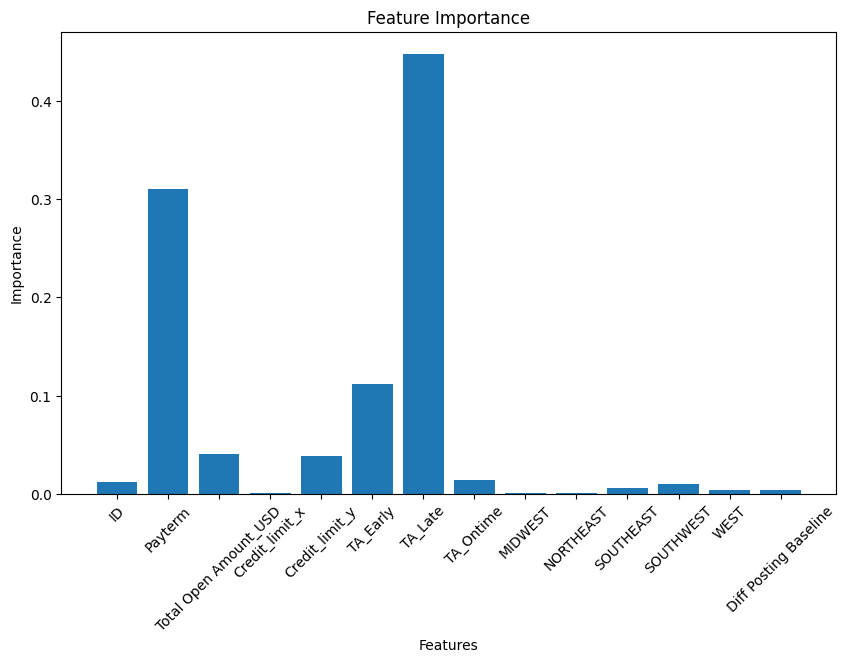

   ID                Predicted_Date  Predicted_Week  ActualPaid_Week
0   1 2020-02-05 21:20:08.912098718               6                7
1   2 2019-08-06 03:45:55.370361940              32               32
2   3 2019-07-22 02:26:31.945255089              30                1
3   4 2019-11-30 09:39:49.146424251              48               48
4   5 2019-07-10 02:01:45.622992962              28               49


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from datetime import timedelta

# Prepare data for training
X = model_columns.drop('Payment_Delay', axis=1)
y = model_columns['Payment_Delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train multiple regressors
regressors = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    ExtraTreesRegressor(),
    LinearRegression(),
    Ridge(),
    KNeighborsRegressor(),
    SVR()
]

best_regressor = None
best_rmse = np.inf
results = []

for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': regressor.__class__.__name__, 'RMSE': rmse, 'R-squared': r2})
    if rmse < best_rmse:
        best_rmse = rmse
        best_regressor = regressor

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print(results_df)

# Train the best model
best_regressor.fit(X_train, y_train)
importances = best_regressor.feature_importances_ if hasattr(best_regressor, 'feature_importances_') else None

# Predict
y_train_pred = best_regressor.predict(X_train)
y_test_pred = best_regressor.predict(X_test)

# Evaluate
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Best Model:", best_regressor.__class__.__name__)
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Plot feature importance if available
if importances is not None:
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, importances)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.xticks(rotation=45)
    plt.show()

# Predict due dates
accounts_receivables['Predicted_Days'] = best_regressor.predict(X)
accounts_receivables['Predicted_Date'] = accounts_receivables['Due_Date'] + pd.to_timedelta(accounts_receivables['Predicted_Days'], unit='D')
accounts_receivables['Predicted_Week'] = accounts_receivables['Predicted_Date'].dt.isocalendar().week
accounts_receivables['ActualPaid_Week'] = accounts_receivables['Payment_Date'].dt.isocalendar().week

# Display results
print(accounts_receivables[['ID', 'Predicted_Date', 'Predicted_Week', 'ActualPaid_Week']].head())


Dimension data: 20000 rows and 15 columns
         Invoice Number         Posting Date         Invoice Date  \
0  INV-5978675602067198  2019-04-12 00:00:00  2019-04-12 00:00:00   
1  INV-4385639898658799           16-03-2020  2020-12-03 00:00:00   
2  INV-4586812911382721           26-12-2019           24-12-2019   
3  INV-8091675473911407           14-01-2020  2020-10-01 00:00:00   
4  INV-9623721287362728  2019-08-12 00:00:00  2019-04-12 00:00:00   

          Payment Date Net Due Date (System Calculated Date) Supplier ID  \
0           30-12-2019                   2020-04-01 00:00:00       S-198   
1                  NaN                            16-04-2020       S-187   
2  2020-01-01 00:00:00                            26-02-2020       S-300   
3                  NaN                            14-02-2020       S-497   
4           20-01-2020                   2020-08-03 00:00:00       S-310   

   Invoice Amount Fiscal year  Overdue Invoice Status Spend Category  \
0            7

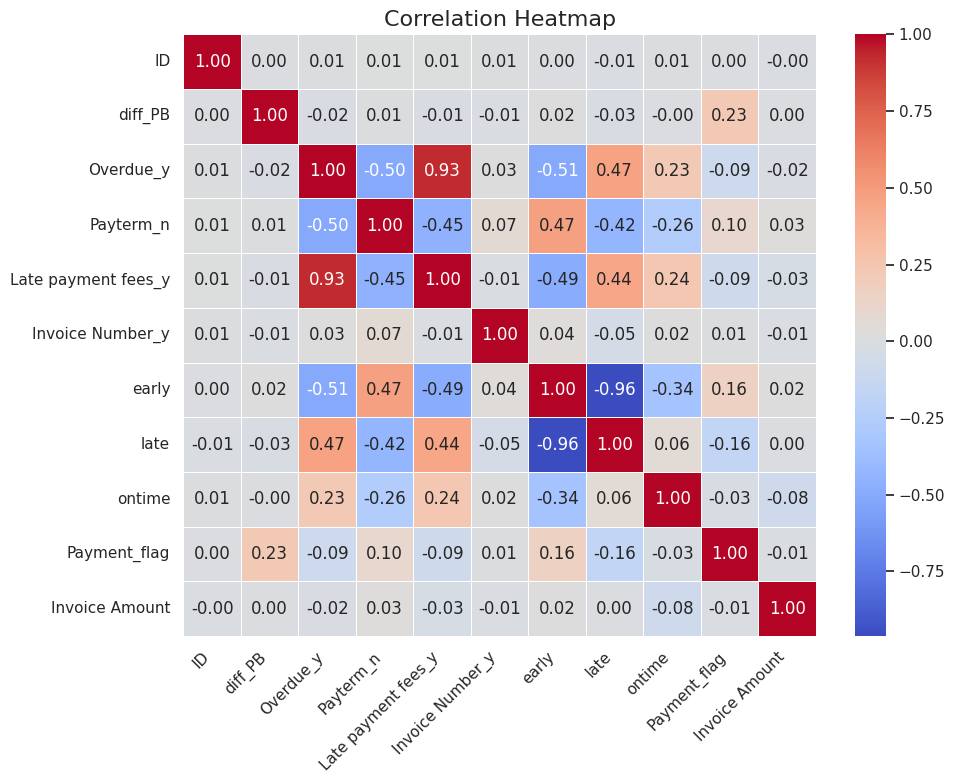

          ID      Invoice Number_x  diff_PB  Spend Category_Fees  \
0          1  INV-5978675602067198        0                False   
1          2  INV-4586812911382721        2                False   
2          3  INV-9623721287362728      122                False   
3          4  INV-6391763768436907        0                False   
4          5   INV-576255376736098        3                False   
...      ...                   ...      ...                  ...   
13983  13984  INV-2094234150697486       30                False   
13984  13985  INV-9971508041177690      -25                False   
13985  13986   INV-923263686839893        0                False   
13986  13987  INV-5306060259604092        0                False   
13987  13988  INV-3588784185880170      -53                False   

       Spend Category_Raw Material  Spend Category_Services  \
0                            False                    False   
1                             True                    Fal

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
suppliers_data = pd.read_excel("suppliers_data.xls")
payables_data = pd.read_excel("payables_data.xls")

# Create a copy of payables data
df_ap = payables_data.copy()

# Print the dimension of the data
print(f'Dimension data: {len(df_ap)} rows and {len(df_ap.columns)} columns')

# Print the first 5 rows
print(df_ap.head())

# Print the data types of each column
print(df_ap.dtypes)

# Filter paid invoices
df_Paid = df_ap[df_ap['Invoice Status'] != 'Unpaid']

# Convert date columns from object to datetime
df_Paid['Posting_Date'] = pd.to_datetime(df_Paid['Posting Date'])
df_Paid['Due_Date'] = pd.to_datetime(df_Paid['Net Due Date (System Calculated Date)'])
df_Paid['Invoice Date'] = pd.to_datetime(df_Paid['Invoice Date'])
df_Paid['Payment Date'] = pd.to_datetime(df_Paid['Payment Date'])

# Convert certain columns to numeric types with rounding
df_Paid['Invoice Amount'] = df_Paid['Invoice Amount'].astype(float).round(1)
df_Paid['Overdue'] = df_Paid['Overdue'].astype(float).round(1)
df_Paid['Total Outstanding amount'] = df_Paid['Total Outstanding amount'].astype(float).round(1)
df_Paid['Late payment fees'] = df_Paid['Late payment fees'].astype(float).round(1)
df_Paid['Payterm_n'] = df_Paid['Payterm_n'].astype(int)

# Copy data for processing
Result_dp = df_Paid.copy()

# Create a new ID column
Result_dp['ID'] = range(1, len(Result_dp) + 1)

# Calculate the aging for payment
Result_dp['Payment_flag'] = Result_dp['Due_Date'] - Result_dp['Payment Date']
Result_dp['Payment_flag'] = pd.to_numeric(Result_dp['Payment_flag'].dt.days, downcast='integer')

# Create payment status flags (early, late, ontime)
conditions = [
    (Result_dp['Payment_flag'] == 0),
    (Result_dp['Payment_flag'] < 0),
    (Result_dp['Payment_flag'] > 0)
]
choices = ['ontime', 'late', 'early']
Result_dp['payment_flagname'] = np.select(conditions, choices, default='NA')

# Print the value counts of payment_flagname
print(Result_dp['payment_flagname'].value_counts())

# Create customer-level features (sum of invoice amount, late payment fees, etc.)
vendor_pivot = Result_dp.groupby(['Supplier ID', 'payment_flagname']).agg(
    {
        'Invoice Amount': 'sum',
        'Late payment fees': 'mean',
        'Invoice Number': 'count',
        'Overdue': 'mean'
    }
).reset_index()

# Create additional features at the supplier level
vendor_pivot_others = Result_dp.groupby(['Supplier ID']).agg(
    {
        'Late payment fees': 'mean',
        'Invoice Number': 'count',
        'Overdue': 'mean'
    }
).reset_index()

# Pivot data by 'payment_flagname'
reshaped_dataAP = vendor_pivot.pivot(index=['Supplier ID'], columns='payment_flagname', values='Invoice Amount')

# Fill missing values with 0
df_filled_ap = reshaped_dataAP.fillna(0)

# Calculate row sums
row_sums_ap = df_filled_ap.sum(axis=1)

# Calculate percentage split for each supplier
df_percent_ap = df_filled_ap.div(row_sums_ap, axis=0) * 100

# Merge additional supplier-level data (Late payment fees, Invoice count, etc.)
df_ap_others = vendor_pivot_others[['Supplier ID', 'Invoice Number', 'Late payment fees', 'Overdue']]

merged_df_ap = pd.merge(df_percent_ap, df_ap_others, on='Supplier ID')

# Merge with original data to get invoice level features
Masterdata_ap = pd.merge(Result_dp, merged_df_ap, on='Supplier ID', how='left')

# Convert categorical columns into dummy variables
dummy_df_ap = pd.get_dummies(Masterdata_ap[['Spend Category', 'Vendor_Type']])

# Concatenate the dummy variables with the original DataFrame
Masterdata_ap = pd.concat([Masterdata_ap, dummy_df_ap], axis=1)

# Calculate the difference between posting and invoice date
Masterdata_ap['diff_PB'] = Masterdata_ap['Posting_Date'] - Masterdata_ap['Invoice Date']
Masterdata_ap['diff_PB'] = pd.to_numeric(Masterdata_ap['diff_PB'].dt.days, downcast='integer')

# Select relevant columns for model building
Model_columns_ap = Masterdata_ap.loc[:, [
    'ID', 'Invoice Number_x', 'diff_PB', 'Spend Category_Fees',
    'Spend Category_Raw Material', 'Spend Category_Services', 'Spend Category_Taxes',
    'Spend Category_Utility', 'Overdue_y', 'Payterm_n', 'Vendor_Type_Domestic',
    'Vendor_Type_International', 'Late payment fees_y', 'Invoice Number_y',
    'early', 'late', 'ontime', 'Payment_flag', 'Invoice Amount'
]]

# Select only numeric columns for correlation matrix
numeric_columns_ap = Model_columns_ap.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
corr_matrix = numeric_columns_ap.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find columns with high correlation (greater than 0.8)
high_corr_columns = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            high_corr_columns.add(colname)

# Drop the columns with high correlation
Model_columns_ap_new = Model_columns_ap.drop(high_corr_columns, axis=1)

# Print the final model data
print(Model_columns_ap_new)


Distribution of Invoice Amount


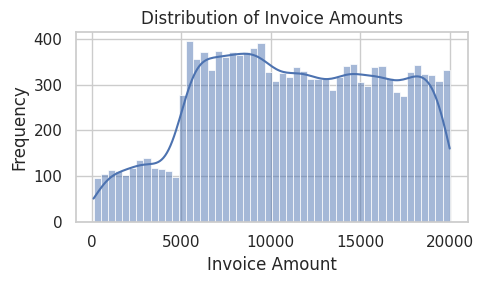

Distribution of Overdue Days


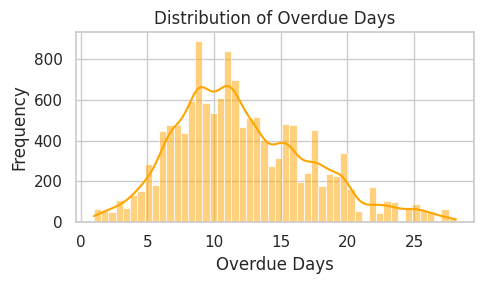

Payment Behavior Distribution


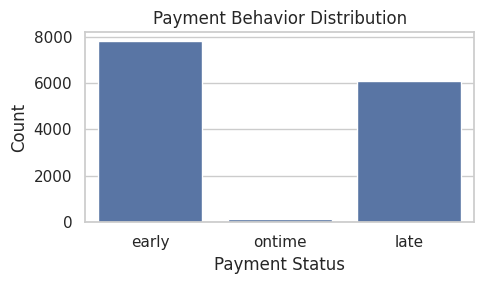

Invoice Amount by Payment Behavior


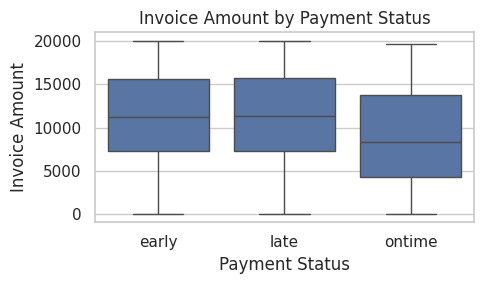

Crosstab of Vendor Type vs Spend Category

=== Vendor Type vs Spend Category (in %) ===
Spend Category  Fees  Raw Material  Services  Taxes  Utility
Vendor_Type                                                 
Domestic        0.50         86.61      7.38   0.29     5.22
International   7.44         27.18     33.01  10.03    22.33


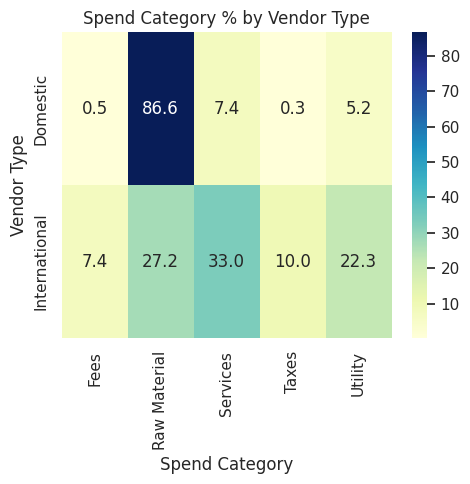

Scatter plot of Invoice Amount vs Late payment fees


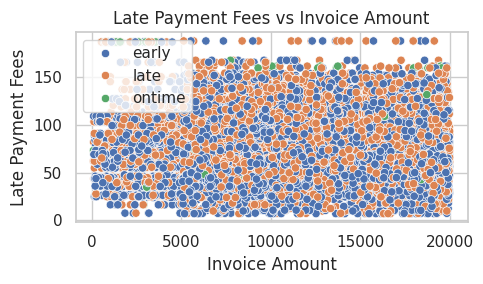

Boxplot of Late payment fees by Vendor Type


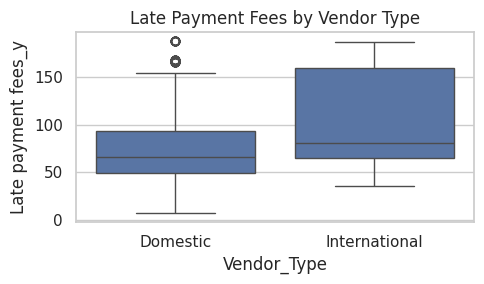

Days between Invoice Date and Posting Date


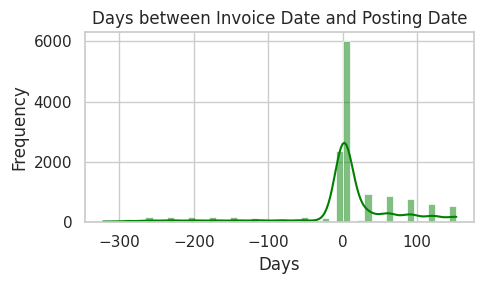

Top 10 suppliers by total invoice amount


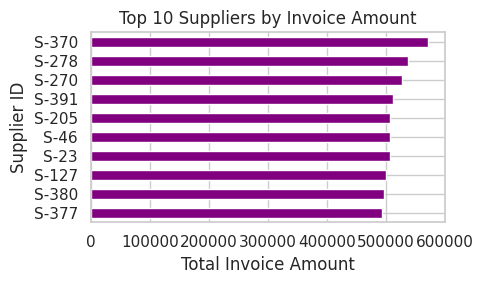

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid")

# Distribution of Invoice Amount
print("Distribution of Invoice Amount")
plt.figure(figsize=(5, 3))
sns.histplot(Masterdata_ap['Invoice Amount'], kde=True, bins=50)
plt.title('Distribution of Invoice Amounts')
plt.xlabel('Invoice Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Distribution of Overdue Days
print("Distribution of Overdue Days")
plt.figure(figsize=(5, 3))
sns.histplot(Masterdata_ap['Overdue_y'], kde=True, bins=50, color='orange')
plt.title('Distribution of Overdue Days')
plt.xlabel('Overdue Days')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Payment Behavior Distribution
print("Payment Behavior Distribution")
plt.figure(figsize=(5, 3))
sns.countplot(x='payment_flagname', data=Masterdata_ap, order=['early', 'ontime', 'late'])
plt.title('Payment Behavior Distribution')
plt.xlabel('Payment Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Invoice Amount by Payment Behavior
print("Invoice Amount by Payment Behavior")
plt.figure(figsize=(5, 3))
sns.boxplot(x='payment_flagname', y='Invoice Amount', data=Masterdata_ap)
plt.title('Invoice Amount by Payment Status')
plt.xlabel('Payment Status')
plt.ylabel('Invoice Amount')
plt.tight_layout()
plt.show()

# Crosstab of Vendor Type vs Spend Category
print("Crosstab of Vendor Type vs Spend Category")
crosstab = pd.crosstab(Masterdata_ap['Vendor_Type'], Masterdata_ap['Spend Category'], normalize='index') * 100
print("\n=== Vendor Type vs Spend Category (in %) ===")
print(crosstab)

plt.figure(figsize=(5, 5))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Spend Category % by Vendor Type')
plt.xlabel('Spend Category')
plt.ylabel('Vendor Type')
plt.tight_layout()
plt.show()

# Scatter plot of Invoice Amount vs Late payment fee
print("Scatter plot of Invoice Amount vs Late payment fees")
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Invoice Amount', y='Late payment fees_y', hue='payment_flagname', data=Masterdata_ap)
plt.title('Late Payment Fees vs Invoice Amount')
plt.xlabel('Invoice Amount')
plt.ylabel('Late Payment Fees')
plt.legend()
plt.tight_layout()
plt.show()

# Boxplot of Late payment fees by Vendor Type
print("Boxplot of Late payment fees by Vendor Type")
plt.figure(figsize=(5, 3))
sns.boxplot(x='Vendor_Type', y='Late payment fees_y', data=Masterdata_ap)
plt.title('Late Payment Fees by Vendor Type')
plt.tight_layout()
plt.show()

# Days between Invoice Date and Posting Date
print("Days between Invoice Date and Posting Date")
plt.figure(figsize=(5, 3))
sns.histplot(Masterdata_ap['diff_PB'], kde=True, bins=50, color='green')
plt.title('Days between Invoice Date and Posting Date')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Top 10 suppliers by total invoice amount
print("Top 10 suppliers by total invoice amount")
top_suppliers = Masterdata_ap.groupby('Supplier ID')['Invoice Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(5, 3))
top_suppliers.plot(kind='barh', color='purple')
plt.xlabel('Total Invoice Amount')
plt.title('Top 10 Suppliers by Invoice Amount')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Training R-squared: 0.16828166692745905
Test R-squared: 0.13116767576703858
Training Mean Squared Error (MSE): 13149.24602213736
Test Mean Squared Error (MSE): 13865.666009184652


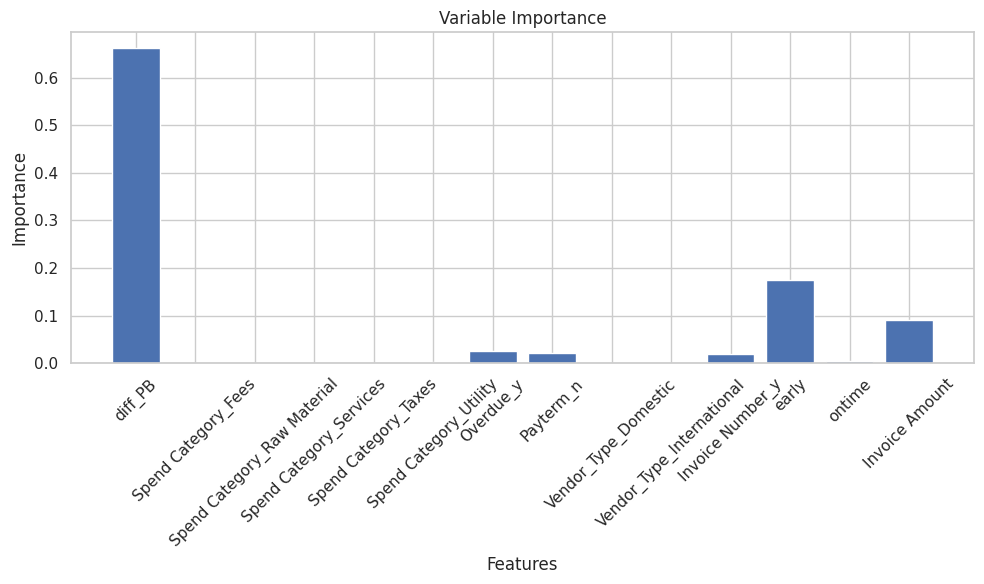

       index      Invoice Number_x         Posting Date Invoice Date  \
0          0  INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   
1          1  INV-4586812911382721           26-12-2019   2019-12-24   
2          2  INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   
3          3  INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   
4          4   INV-576255376736098           18-07-2019   2019-07-15   
...      ...                   ...                  ...          ...   
13983  13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   
13984  13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   
13985  13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   
13986  13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   
13987  13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   

      Payment Date Net Due Date (System Calculated Date) Supplier ID  \
0       2019-12-30                   2020-04-01 00:00:00       

In [ ]:

# Fill missing values with 0
Model_columns_AP1 = Model_columns_ap_new.fillna(0)

# Split the data into features (X) and target variable (y)
X_AP = Model_columns_AP1.drop('Payment_flag', axis=1)
y_AP = Model_columns_AP1['Payment_flag']

# Split the data into train and test sets
X_trainap, X_testap, y_trainap, y_testap = train_test_split(X_AP, y_AP, test_size=0.3, random_state=42)

# Drop unnecessary columns
X_train_ap = X_trainap.drop(['Invoice Number_x', 'ID'], axis=1)
X_test_ap = X_testap.drop(['Invoice Number_x', 'ID'], axis=1)

# Create and train the gradient boosting model
model_gb_ap = GradientBoostingRegressor()
model_gb_ap.fit(X_train_ap, y_trainap)

# Feature importance extraction
importances_ap = model_gb_ap.feature_importances_

# Predict on training and test data
y_train_predap = model_gb_ap.predict(X_train_ap)
y_test_predap = model_gb_ap.predict(X_test_ap)

# Model evaluation
train_r2ap = r2_score(y_trainap, y_train_predap)
test_r2ap = r2_score(y_testap, y_test_predap)
train_mseap = mean_squared_error(y_trainap, y_train_predap)
test_mseap = mean_squared_error(y_testap, y_test_predap)

print("Training R-squared:", train_r2ap)
print("Test R-squared:", test_r2ap)
print("Training Mean Squared Error (MSE):", train_mseap)
print("Test Mean Squared Error (MSE):", test_mseap)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(X_train_ap.columns, importances_ap)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Convert predictions to DataFrame
train_predictions_ap = pd.DataFrame(y_train_predap, columns=['Predicted_value'])
test_predictions_ap = pd.DataFrame(y_test_predap, columns=['Predicted_value'])

# Reset index for merging
X_train_reset = X_train_ap.reset_index()
X_test_reset_ap = X_test_ap.reset_index()

# Merge predictions with feature data
merged_df_v2_ap = pd.concat([X_train_reset, train_predictions_ap], axis=1)
merged_df_test_ap = pd.concat([X_test_reset_ap, test_predictions_ap], axis=1)
merged_df_all_ap = pd.concat([merged_df_v2_ap, merged_df_test_ap], axis=0)

# Reset index for Masterdata_ap
Masterdata_ap = Masterdata_ap.reset_index()

# Merge Masterdata with predicted values
accounts_payables = pd.merge(Masterdata_ap, merged_df_all_ap[['index', 'Predicted_value']], on='index')

# Convert the predicted value (days) to timedelta
accounts_payables['Predict_Timedelta'] = pd.to_timedelta(accounts_payables['Predicted_value'], unit='days')

# Calculate predicted date by adding timedelta to the due date
accounts_payables['Predicted_Date'] = accounts_payables['Due_Date'] + accounts_payables['Predict_Timedelta']

# Ensure datetime conversion
accounts_payables['Predicted_Date'] = pd.to_datetime(accounts_payables['Predicted_Date'])

# Extract week numbers using isocalendar (fixing the deprecated `.week` attribute)
accounts_payables['Predicted_Week'] = accounts_payables['Predicted_Date'].dt.isocalendar().week
accounts_payables['ActualPaid_week'] = accounts_payables['Payment Date'].dt.isocalendar().week

# Display final merged DataFrame
print(accounts_payables)

# Calculate prediction accuracy
correct_predictionsap = (accounts_payables['ActualPaid_week'] == accounts_payables['Predicted_Week']).sum()
total_predictionsap = len(accounts_payables)
accuracyap = correct_predictionsap / total_predictionsap

# Print accuracy
print("Accuracy:", accuracyap)

# Display final DataFrame head
print(accounts_payables.head())

# Print column names
for col in accounts_payables.columns:
    print(col)

In [ ]:
# Extract relevant columns
Week_AR = accounts_receivables.loc[:, ['Predicted_Week', 'Total Open Amount_USD']]
Week_AP = accounts_payables.loc[:, ['Predicted_Week', 'Invoice Amount']]

# Group by 'Predicted_Week' and aggregate the sum
APBYWEEK = Week_AP.groupby(['Predicted_Week']).agg({'Invoice Amount': 'sum'}).reset_index()
ARBYWEEK = Week_AR.groupby(['Predicted_Week']).agg({'Total Open Amount_USD': 'sum'}).reset_index()

# Rename columns for clarity
ARBYWEEK.rename(columns={'Total Open Amount_USD': 'Amount_AR'}, inplace=True)
APBYWEEK.rename(columns={'Invoice Amount': 'Amount_AP'}, inplace=True)

# Print the grouped DataFrames
print("Accounts Receivable by Week (AR):\n", ARBYWEEK)
print("\nAccounts Payable by Week (AP):\n", APBYWEEK)

# Merge AR and AP datasets on 'Predicted_Week'
WCOBYWEEK_1 = pd.merge(ARBYWEEK, APBYWEEK, on='Predicted_Week', how='outer').fillna(0)

# Calculate Working Capital
WCOBYWEEK_1['Working_Capital'] = WCOBYWEEK_1['Amount_AR'] - WCOBYWEEK_1['Amount_AP']

# Display the final working capital table
print("\nWorking Capital by Week:\n", WCOBYWEEK_1)

Accounts Receivable by Week (AR):
     Predicted_Week   Amount_AR
0                1  8911674.00
1                2  7531843.60
2                3 25722479.50
3                4 34122150.80
4                5 35498445.20
5                6 38618438.30
6                7 38409381.10
7                8 37717635.70
8                9 36777421.00
9               10 36113626.80
10              11 33806999.00
11              12 23829507.70
12              13 23003434.10
13              14 18895475.00
14              15 22694310.10
15              16 21996145.10
16              17 21846178.10
17              18 22432023.50
18              19 21032461.50
19              20 22315887.00
20              21 23737812.70
21              22 19815865.70
22              23 21060725.00
23              24 22689431.30
24              25 20063206.20
25              26 21701079.50
26              27 25709720.50
27              28 22998961.10
28              29 20110444.80
29              30 19055990.90
30  